# Exercise 2.10

Create a GeometryCollection with Shapely regarding an
imaginary squared Island with a lake, a house, and a road.
* Island: a square centered at (0, 0) with side 10
* Lake: rectangle base 3, height 2, bottom-left corner at (-2.5, 0)
* House: Point centered at (3, 2) with size (buffer) 1
* Road: line connecting the lake’s center and the house’s center
* Plot the collection using folium
* Submit a (well-documented) notebook

## Installing the packages

In [ ]:
# correct order to avoid errors
!pip install Shapely
!pip install folium
!pip install Fiona
!pip install pyproj
!pip install rtree
!pip install pygeos
!pip install scikit-mobility
!pip install -U geopandas #scikit mobilty force the installation of geopandas 0.9 for compatibiltiy but that version doesn't have some features as "sjoin" from geopandas
!pip install geovoronoi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.3 MB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 5.0 MB/s 
     |███████████████

## Importing Libraries

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np

import skmob
import folium
import random

#to download and extract the shape files
import urllib.request
import zipfile
import os

#to perform the union of the two sets of bottom and top 1%
from shapely.ops import unary_union
from shapely.geometry import *

## Writing the functions to create the objects

In [ ]:
#Island
island_side = 10 #island side
island_origin = (0,0) #origin
#Lake
lake_base = 3
lake_height = 2
lake_origin = (-2.5, 0)
#House
house_origin = (3,2)
house_buffer = 1

 #considering I have to center the square at 0, 0 I just started the square at -5, -5, so that with side 10 is centered at 0,0
def create_island(origin, side):
    a = origin[0]-side/2, origin[0]-side/2
    b = origin[0]+side/2, origin[1]-side/2
    c = origin[0]+side/2, origin[1]+side/2
    d = origin[0]-side/2, origin[1]+side/2
    return Polygon([a, b, c, d])

def create_lake(origin, base, height):
    a = origin
    b = origin[0]+base, origin[1]
    c = origin[0]+base, origin[1]+height
    d = origin[0], origin[1]+height
    return Polygon([a, b, c, d])

def create_house(origin, buffer):
    return Point(origin).buffer(buffer)

## Creating the geometries and the collection

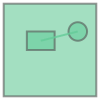

In [ ]:
island = create_island(island_origin, island_side)
lake = create_lake(lake_origin, lake_base, lake_height)
house = create_house(house_origin, house_buffer)

lake_center = list(lake.centroid.coords)[0]
house_center = list(house.centroid.coords)[0]

road = LineString((house_center, lake_center))

collection = GeometryCollection([island, lake, house, road])
collection

## Plotting the result

In [ ]:
mappa = folium.Map(location = island_origin, zoom_start = 5)
folium.GeoJson(collection).add_to(mappa)
mappa